In [1]:
import os 
import numpy as np
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, HTML
from scipy import stats
mpl.rc('font',family='Times New Roman')
path = r"C:\Users\reape\Desktop\Sp24\NPRE 451\lab 7\LAB 7\\"
save_path = r"C:\Users\reape\Desktop\Sp24\NPRE 451\lab 7\deliverables\\"
keys = os.listdir(path)
keys = sorted(keys)

# correct order: ['ba133.mca', 'backgr.mca', 'co57.mca', 'co60.mca', 'cs137.mca', 'cs137_t2.mca', 'eu152.mca', 'mn54.mca']

In [2]:
def D_maker(keys,path):
    '''
    makes dictionary of everything
    '''
    D = {}
    for key in keys:
        D[key]=np.array(pd.read_csv(path+key,header = 11,skipfooter = 73, engine = 'python',encoding='unicode_escape'))
    return D
def int_eff(c,A):
    '''
    intrinsic efficiency
    counts obseved, counts expected
    '''
    return c/A
def activ_count(te,tt,th,b):
    '''
    te is time elapsed since inception of source 
    tt is time of trial 
    th is half life of isotope
    b is branching ratio times branching fraction 
    
    assuming initial activity of source was 1 microcurie
    '''
    tt *= 60
    decay = np.log(2)/th
    act = np.exp(-te*decay)*37000*tt*b
    return act*Omega(10)[0]
def activ(te,th,b):
    decay = np.log(2)/th
    return np.exp(-te*decay)*b
def Omega(d_to):
    '''
    r is radius of detector
    d_to is the distance we measured.
    returns fractional solid angle and error
    '''
    h = 3.54
    r = 4.94/2
    jawn = .3+.127
    dist = d_to+jawn
    d = r**2/2+h**2/12+dist**2
    omeg = r**2/(4*d) #2 because only half of source?
    o_err = ((2*.01)/r)**2+((2*.01)/d)**2
    o_err = o_err**.5*omeg
    return omeg, o_err
def abs_eff(ie, fo):
    '''
    ie is intrinsic efficiency 
    fo is fractional omega
    returns abs efficiency 
    '''
    return ie*fo

def err_finder(x,m_err,b_err):
    return np.sqrt(m_err**2*x**2+b_err**2)

def gaussian(x,A, mu, sigma):
    t = (x-mu)/sigma
    return A/np.sqrt(2*np.pi)/sigma * np.exp(-t**2/2)


def eff_finder(x,a,b,c,d):
    cons = np.array([a,b,c,d])
    sum = 0
    for k in range(len(cons)):
        sum += cons[k]*np.log(x)**(k)      
    return sum

def err_intr(ac,c,sig_c):
    o,o_err = Omega(10)
    '''
    bot = ac*o#*4*np.pi
    bot2 = bot*o#*4*np.pi
    sum = (1/bot)**2*sig_c**2+(c/bot2)**2*o_err**2
    '''
    sig_abs = sig_c/ac*o
    sum = (1/o)**2*sig_abs**2+(c/(ac*o))**2*o_err**2
    return sum**.5

Deliverable 2:


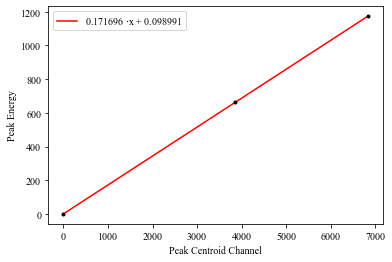

Deliverable 3:


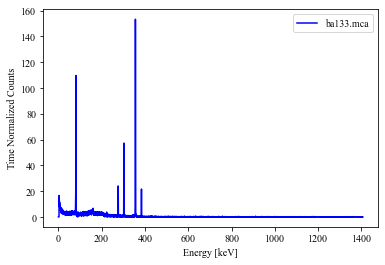

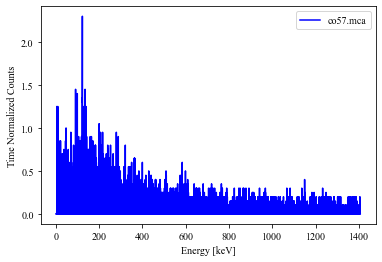

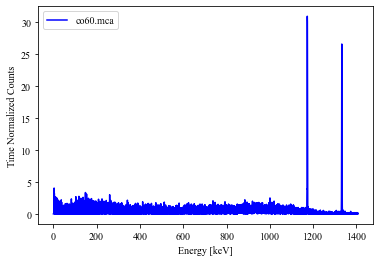

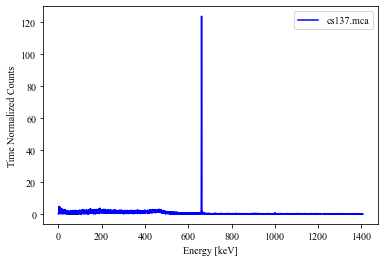

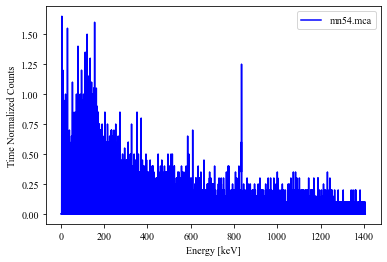

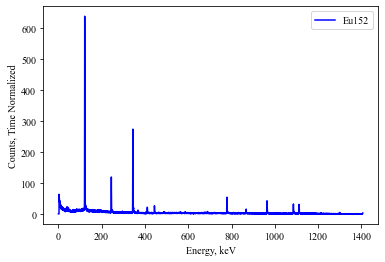

Deliverable 4:


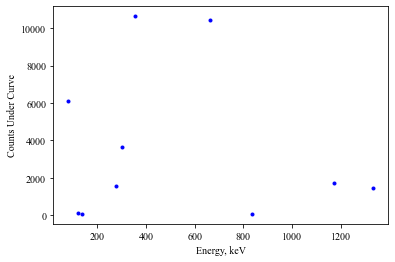

,Area Under Curve,Error of Area,Peak Centroid Channel (mean),Peak Centroid Energy (mean * calibration coefficient),Standard Deviation
Ba-133,6106.134629,203.623298,470.435061,80.771949,2.315225
Co-57,114.653674,13.966450,710.731095,122.029883,2.737358
Co-57,69.547681,50.954538,786.788300,135.088622,12.194232
Ba-133,1554.779083,32.231927,1608.102074,276.105140,2.655398
Ba-133,3667.576958,59.141952,1762.381978,302.594425,2.679587
Ba-133,10635.386253,68.235888,2071.940343,355.744444,2.746048
Cs-137,10443.112998,58.065023,3851.907570,661.358190,3.390002
Mn-54,87.832510,7.278473,4860.837918,834.587775,3.527203
Co-60,1711.663958,25.678395,6833.243538,1173.242477,4.337419
Co-60,1455.274227,29.255617,7761.554949,1332.630091,4.446292


Deliverable 5:
The Geometric Efficiency of the Detector is 0.01352, and the Error Associated with the solid angle is 0.00011.
Deliverable 6:


,Peak Energy,Intrinsic Efficiency,Intrinsic Error,Branching Ratio,Branching Factor
Ba-133,81.0,0.094778,0.004986,1.0,0.329000
Co-57,122.0,0.189595,0.000128,1.0,0.856000
Co-57,136.0,0.921772,0.003673,1.0,0.108600
Ba-133,276.0,0.110891,0.003783,1.0,0.071600
Ba-133,302.0,0.102122,0.002825,1.0,0.183400
Ba-133,356.0,0.087529,0.001386,1.0,0.620500
Cs-137,662.0,0.047494,0.000944,1.0,0.851000
Mn-54,835.0,0.056763,0.000057,1.0,0.999760
Co-60,1173.0,0.026838,0.000458,1.0,0.998500
Co-60,1332.0,0.022823,0.000494,1.0,0.999826


Deliverable 7:


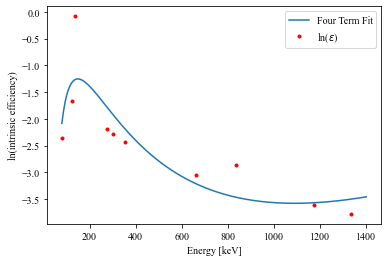

For the intrinsic efficiency, a0 is -119.94257320421902, a1 is 62.279343566741936, a2 is -10.673360195141578, and a3 is 0.5930045361949665, and E0 is 1.0
Deliverable 8:


,Expected Energy,Peak Centroid Energy,"Associated Peak Activity, uCi"
0,121.7817,121.579417,1.760517
1,244.6974,244.420848,1.847094
2,344.2785,343.994599,2.118770


In [31]:
######
#####

#THE Co60 ONE IS FOR 300 SECONDS NOT 600

D = D_maker(keys,path)
e1_keys = [keys[0],keys[2],keys[3],keys[4],keys[-1]]
bg = keys[1]
e2_key = keys[6]
plot_labels = ['$^{133}$Ba','$^{57}$Co','$^{60}$Co','$^{137}$Cs','$^{54}$Mn']


# deliv 1 is done for each deliv
print('Deliverable 2:')
#Deliverable 2
x = np.arange(0,len(D[e1_keys[3]]))+1
co60_spec = D[e1_keys[2]]
cs137_spec = D[e1_keys[3]]

locs_calib = np.array([0,np.argmax(cs137_spec),np.argmax(co60_spec)])
ener_calib = np.array([0,661.7,1173])
calibration = sp.stats.linregress(locs_calib,ener_calib)

#slope and intercept of fit
m = calibration.slope
b = calibration.intercept

#error calculation for later
m_err = calibration.stderr
b_err = calibration.intercept_stderr

plt.plot(locs_calib,locs_calib*m+b, color = 'red',label = '{} $\cdot$x + {}'.format(np.around(m,6),np.around(b,6)))
plt.plot(locs_calib,ener_calib,'.',color = 'k')
plt.legend()
plt.xlabel('Peak Centroid Channel')
plt.ylabel('Peak Energy')
plt.savefig(save_path+'Calib.png',dpi=600)
plt.show()

print('Deliverable 3:')
#Deliverable 3


for key in e1_keys:
    if key =='co60.mca': 
        y = D[key]/5-D[bg]/20
    else:
        y = D[key]/10-D[bg]/20
    for i in range(len(y)):
        if y[i]<0:
            y[i]=0
    x = np.arange(0,len(y))
    #plt.hist(x*m,bins = len(x),weights = y,color = 'k',label = key)
    plt.plot(x*m,y,color = 'blue',label = key)
    plt.xlabel('Energy [keV]')
    plt.ylabel('Time Normalized Counts')
    plt.savefig(save_path+'deliv3'+key[:-4]+'.png',dpi=600)
    plt.legend()
    plt.show()
back = D[bg]/20
y = D[keys[-2]]/5-back
x_arr = np.arange(0,len(y))*m
plt.plot(x_arr,y,label = 'Eu152',color = 'blue')
plt.xlabel('Energy, keV')
plt.ylabel('Counts, Time Normalized')
plt.savefig(save_path+'deliv3eu252.png',dpi=600)
plt.legend()
plt.show()
print('Deliverable 4:')

#deliverable 4

index = np.array([0,1,1,0,0,0,3,4,2,2])
energies = np.array([81,122,136,276,302,356,662,835,1173,1332])
ass_std = np.array([])
ass_mean = np.array([])
area_arr = np.array([])
intr_eff = np.array([])
area_err = np.array([])
y_conv = 365*24*3600
d_conv = 24*3600
half_lives = np.array([10.551*y_conv,271.74*d_conv,1925.29*d_conv,30.08*y_conv,312.2*d_conv])
b_factors = np.array([.329,.856,.1068,.0716,.1834,.6205,.851,.99976,.9985,.99826])
activity_arr = np.array([])
for i in range(len(energies)):
    guess = int(energies[i]/m)
    a= 15
    back = D[bg][guess-a:guess+a]
    if i<=7:
        y = D[e1_keys[index[i]]][guess-a:guess+a]-back/2
    else:
        y = D[e1_keys[index[i]]][guess-a:guess+a]-back/4
    for j in range(len(y)):
        if y[j] < 0:
            y[j] = 0
    xdata = np.arange(0,len(y),dtype = 'float64')
    y = y.T[0]
    ans = sp.optimize.curve_fit(gaussian,xdata,y,p0 = [50,15,1])
    #print(ans)
    A,mean, std_dev = ans[0][0],ans[0][1]+guess-a,ans[0][2]
    variance = ans[1][0][0]
    sum_err = variance**.5
    area_err = np.append(area_err,sum_err)
    ass_std = np.append(ass_std,std_dev)
    ass_mean = np.append(ass_mean,mean)
    area_arr = np.append(area_arr,A)
    
    a = int(mean)
    y = D[e1_keys[index[i]]][a-20:a+20]
    if i <= 7:
        y = y-D[bg][a-20:a+20]/2
    else:
        y = y-D[bg][a-20:a+20]/4
    for j in range(len(y)):
        if y[j] <0:
            y[j]=0
    x = np.arange(0,len(y))+a-20
    x_fit = np.linspace(mean-20,mean+20,80)
    y_fit = gaussian(x_fit,A,mean,std_dev)

    # these are the gaussian plots compared to the actual spectra
    #plt.plot(x_fit,y_fit,label = 'Gaussian Fit')
    #plt.plot(x,y,label = names[i])
    #plt.legend()
    #plt.show()
 
    
    te = 6.5*365*24*3600
    tt = 5 if i>=8 else 10
    th = half_lives[index[i]]
    b = b_factors[i]
    
    activit = activ(te,th,b)
    activity_arr = np.append(activity_arr,activit)
    
    expected_c = activ_count(te,tt,th,b)
    intrinsic_efficiency = A/expected_c
    intr_eff = np.append(intr_eff,intrinsic_efficiency)

plt.plot(energies,area_arr,'.', color = 'blue')
plt.xlabel('Energy, keV')
plt.ylabel('Counts Under Curve')
plt.savefig(save_path+'deliv4.png',dpi=600)
plt.show()
d4df = pd.DataFrame(np.array([area_arr,area_err,ass_mean,ass_mean*m,ass_std]))
d4df.index = ['Area Under Curve','Error of Area','Peak Centroid Channel (mean)','Peak Centroid Energy (mean * calibration coefficient)','Standard Deviation']
d4df.columns = ['Ba-133','Co-57','Co-57','Ba-133','Ba-133','Ba-133','Cs-137','Mn-54','Co-60','Co-60']
display(HTML(d4df.T.to_html()))



#deliv 5
print('Deliverable 5:')
fract_eff,omega_err = Omega(10)
print('The Geometric Efficiency of the Detector is {}, and the Error Associated with the solid angle is {}.'.format(np.around(fract_eff,5),np.around(omega_err,5)))

print('Deliverable 6:')
#deliv 6 
branch_ratio = np.array([1,1,1,1,1,1,1,1,1,1])
branch_factor = np.array([.329,.856,.1086,.0716,.1834,.6205,.851,.99976,.9985,.999826])
branching = branch_factor*branch_ratio
abs_activ = np.array([])
intrinsic_err = np.array([])
for i in range(len(branching)):  
    tt = 10 if i<=7 else 5
    thalf = half_lives[index[i]]
    b = branching[i]
    ac = activ_count(te,tt,th,b)
    err_int = err_intr(ac,area_arr[i],area_err[i])
    err_int = np.around(err_int,8)
    intrinsic_err = np.append(intrinsic_err,err_int)


branch_ratio = np.array([1,1,1,1,1,1,1,1,1,1])
branch_factor = np.array([.329,.856,.1086,.0716,.1834,.6205,.851,.99976,.9985,.999826])
deliv_6 = pd.DataFrame(np.array([energies,intr_eff,intrinsic_err, branch_ratio,branch_factor]))
deliv_6.columns = ['Ba-133','Co-57','Co-57','Ba-133','Ba-133','Ba-133','Cs-137','Mn-54','Co-60','Co-60']
deliv_6.index = ['Peak Energy','Intrinsic Efficiency','Intrinsic Error','Branching Ratio','Branching Factor']
display(HTML(deliv_6.T.to_html()))

print('Deliverable 7:')
#deliv 7 
xdata = ass_mean*m
ydata = np.log(intr_eff)      
fit_params, cov_array = sp.optimize.curve_fit(eff_finder,xdata,ydata)   
a,b,c,d = fit_params
x = np.linspace(80,1400,1320)
plt.plot(x,eff_finder(x,a,b,c,d),label = 'Four Term Fit')  #plotting the fit
plt.plot(xdata,ydata,'.',label = 'ln($\epsilon$)',color = 'red') #plotting the actual data
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('ln(intrinsic efficiency)')
plt.savefig(save_path+'deliv7.png',dpi=600)
plt.show()
print('For the intrinsic efficiency, a0 is {}, a1 is {}, a2 is {}, and a3 is {}, and E0 is 1.0'.format(a,b,c,d))



#deliv 8
print('Deliverable 8:')
eu_key = keys[-2]
energies = np.array([121.7817,244.6974,344.2785])
branchs_factor = np.array([28.53,7.55,26.59])/100
eu_activ = np.array([])
mean_arr = np.array([])
for i in range(len(energies)):
    branc = branchs_factor[i]
    guess = int(energies[i]/m)
    a = 20
    back = D[bg][guess-a:guess+a]/4
    y = D[eu_key][guess-a:guess+a]
    xdata = np.arange(0,len(y))
    for j in range(len(y)):
        if y[j] < 0:
            y[j] = 0
    y = y.T[0]
    fit = sp.optimize.curve_fit(gaussian,xdata,y)
    A,mean,stddev = fit[0]
    mean = (mean+guess-a)*m
    mean_arr = np.append(mean_arr,mean)
    a,b,c,d = fit_params
    intrin_effic = eff_finder(mean,a,b,c,d)
    intrin_effic = np.exp(intrin_effic)
    activity = A/(intrin_effic*Omega(10)[0]*branc)/37000/300
    eu_activ = np.append(eu_activ,activity)
deliv_8 = np.array([energies,mean_arr,eu_activ])
deliv_8 = pd.DataFrame(deliv_8)
deliv_8.index = ['Expected Energy','Peak Centroid Energy','Associated Peak Activity, uCi']
display(HTML(deliv_8.T.to_html()))

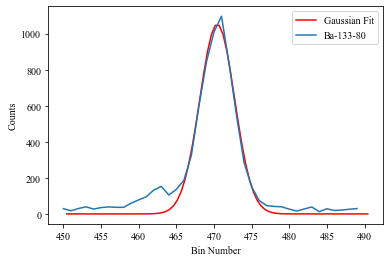

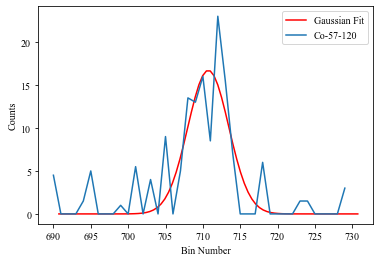

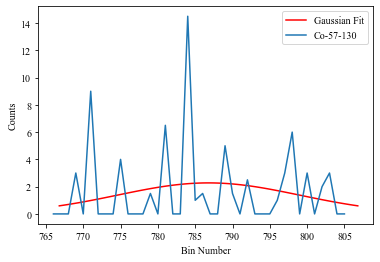

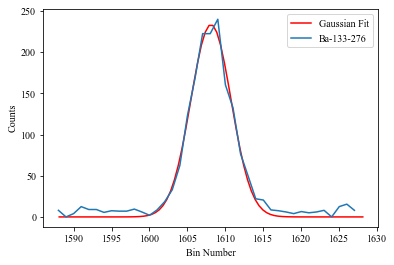

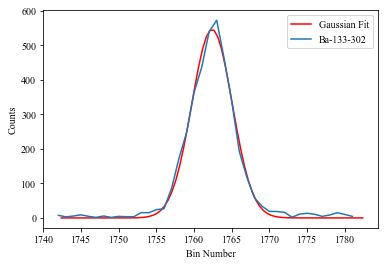

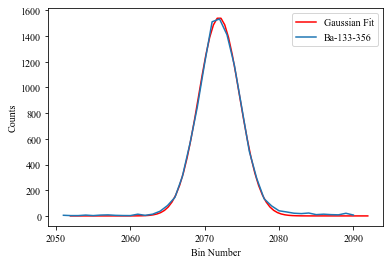

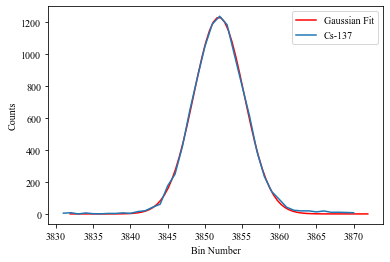

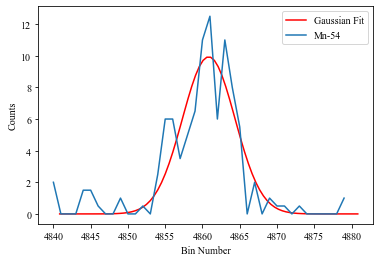

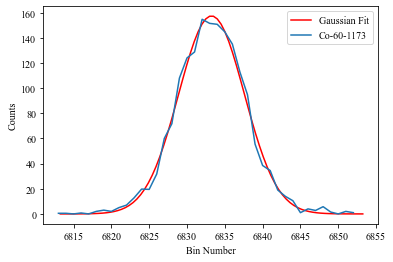

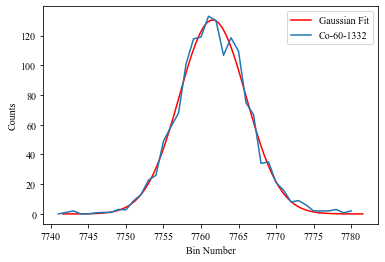

In [27]:
#gaussian fits, these are needed for deliverable 4 


names = ['Ba-133-80','Co-57-120','Co-57-130','Ba-133-276','Ba-133-302','Ba-133-356','Cs-137','Mn-54','Co-60-1173','Co-60-1332']
index = np.array([0,1,1,0,0,0,3,4,2,2])
for i in range(len(area_arr)):
    mean = ass_mean[i]
    std_dev = ass_std[i]
    A = area_arr[i]
    a = int(mean)
    y = D[e1_keys[index[i]]][a-20:a+20]
    if i <= 7:
        y = y-D[bg][a-20:a+20]/2
    else:
        y = y-D[bg][a-20:a+20]/4
    for j in range(len(y)):
        if y[j] <0:
            y[j]=0
    x = np.arange(0,len(y))+a-20
    x_fit = np.linspace(mean-20,mean+20,80)
    y_fit = gaussian(x_fit,A,mean,std_dev)
    plt.plot(x_fit,y_fit,label = 'Gaussian Fit', color='r')
    plt.plot(x,y,label = names[i])
    plt.xlabel('Bin Number')
    plt.ylabel('Counts')
    plt.legend()
    plt.savefig(save_path+'gaussian{}.png'.format(int(mean)),dpi=600)
    plt.show()

In [32]:
cov_array

array([[ 5.86414551e+03, -3.10659274e+03,  5.40324115e+02,
        -3.08764419e+01],
       [-3.10659274e+03,  1.64873205e+03, -2.87258452e+02,
         1.64417788e+01],
       [ 5.40324115e+02, -2.87258452e+02,  5.01338064e+01,
        -2.87411306e+00],
       [-3.08764419e+01,  1.64417788e+01, -2.87411306e+00,
         1.65024095e-01]])